SEMMA (Sample, Explore, Modify, Model, and Assess).

Let's use the "Heart Disease UCI" dataset from Kaggle, which is suitable for demonstrating the SEMMA process. It is often used to predict the presence of heart disease based on various medical attributes.

Step 1: Sample

In [2]:
# Install the Kaggle package
!pip install kaggle

# Create a directory to store the kaggle.json file
!mkdir ~/.kaggle

In [3]:
# Upload the kaggle.json file from your local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riship3499","key":"f05439e4bf2d33cd99322d4f479bfb47"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
100% 67.4k/67.4k [00:00<00:00, 277kB/s]
100% 67.4k/67.4k [00:00<00:00, 276kB/s]


In [7]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [8]:
# Load the dataset using pandas
import pandas as pd
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display the first few rows of the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Step 2: Explore**

The Explore phase in SEMMA involves visualizing and summarizing the data to uncover initial patterns, spot anomalies, and examine relationships between variables. This phase allows us to identify important trends and potential issues like missing values or outliers that might need to be addressed in the Modify phase.

                  id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110  

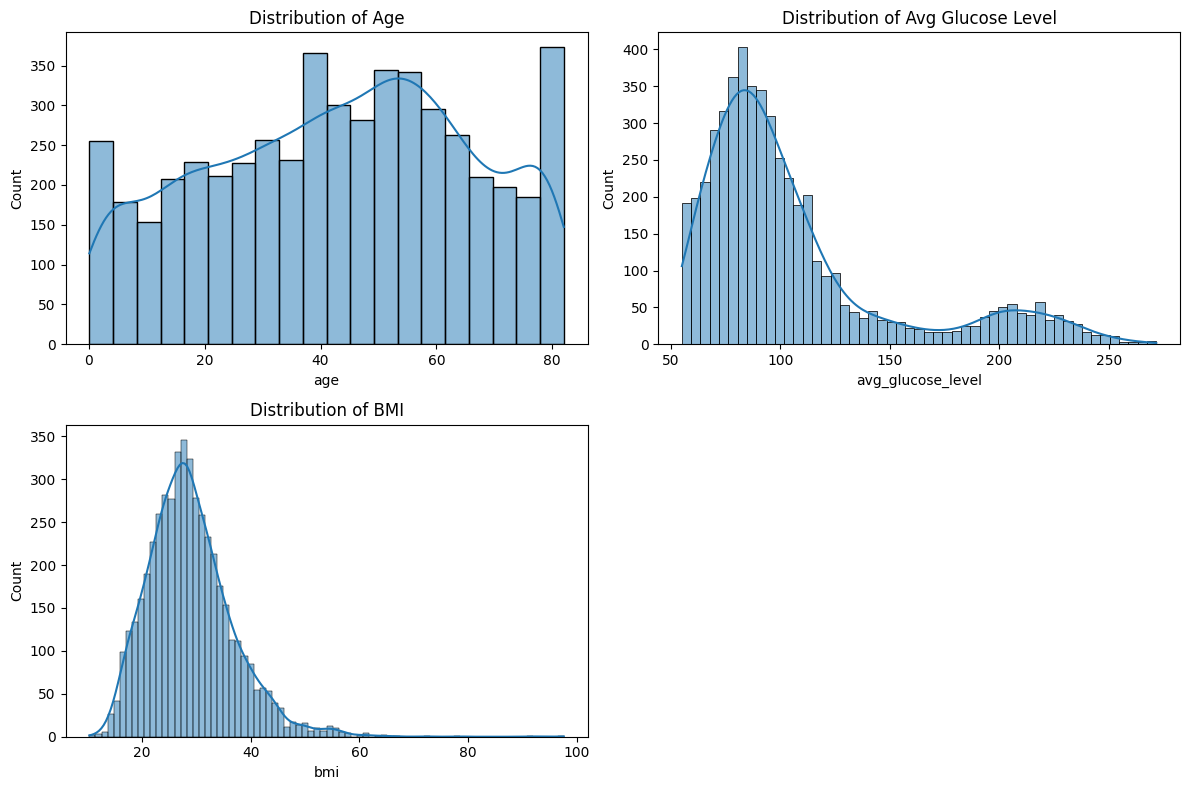

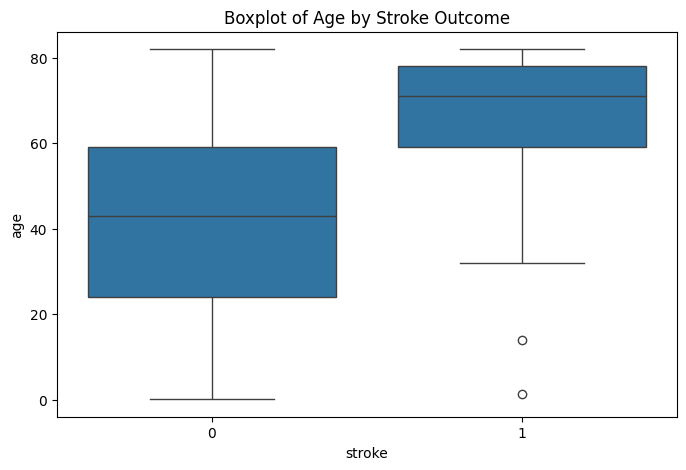

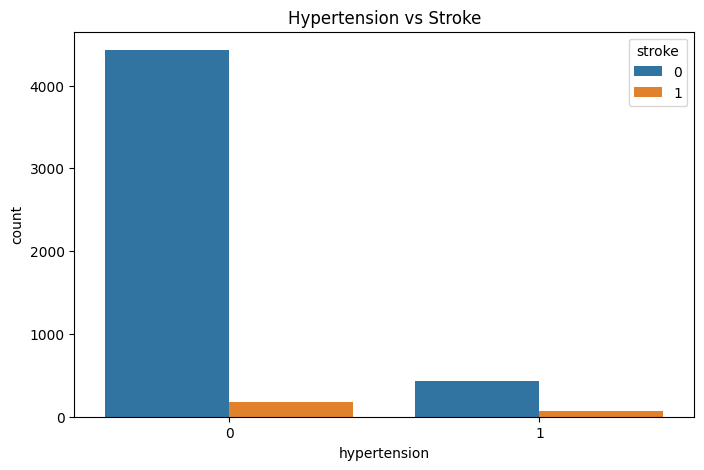

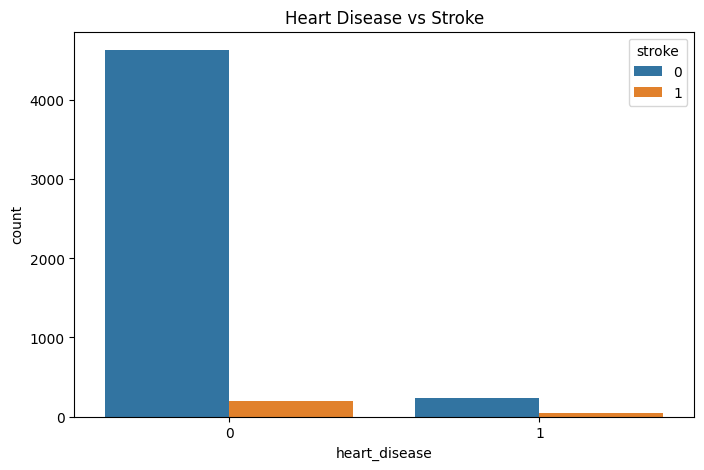

In [10]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics
summary = data.describe(include='all')
print(summary)

# 2. Checking for Missing Values
missing_values = data.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# 3. Distribution of Numerical Features
# Plotting distribution of some important numerical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(data['avg_glucose_level'], kde=True)
plt.title('Distribution of Avg Glucose Level')

plt.subplot(2, 2, 3)
sns.histplot(data['bmi'], kde=True)
plt.title('Distribution of BMI')

plt.tight_layout()
plt.show()

# 5. Relationship between Variables (e.g., Age vs. Stroke)
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Boxplot of Age by Stroke Outcome')
plt.show()

# Checking categorical variables' relationships with stroke
plt.figure(figsize=(8, 5))
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title('Hypertension vs Stroke')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='heart_disease', hue='stroke', data=data)
plt.title('Heart Disease vs Stroke')
plt.show()


**Step 3: Modify**

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 1. Handling Missing Values (Fill BMI with Median)
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# 2. Encoding Categorical Variables
# Use Label Encoding for binary categorical variables
labelencoder = LabelEncoder()
data['gender'] = labelencoder.fit_transform(data['gender'])
data['ever_married'] = labelencoder.fit_transform(data['ever_married'])
data['Residence_type'] = labelencoder.fit_transform(data['Residence_type'])

# Use One-Hot Encoding for multi-class categorical variables
data = pd.get_dummies(data, columns=['work_type', 'smoking_status'], drop_first=True)

# 3. Scaling Numerical Features
scaler = StandardScaler()
numerical_features = ['age', 'avg_glucose_level', 'bmi']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 4. Splitting Data into Features and Target
X = data.drop('stroke', axis=1)  # Features
y = data['stroke']  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4088, 16)
X_test shape: (1022, 16)
y_train shape: (4088,)
y_test shape: (1022,)


**Step 4: Model**

In [12]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Logistic Regression Model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 3. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions with all three models
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate all models
evaluate_model(y_test, log_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest Classifier")
evaluate_model(y_test, svm_pred, "Support Vector Machine")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9384
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[959   1]
 [ 62   0]]


Model: Random Forest Classifier
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[960   0]
 [ 62   0]]


Model: Support Vector Machine
Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[960   0]
 [ 62   0]]




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Step 5: Assess**

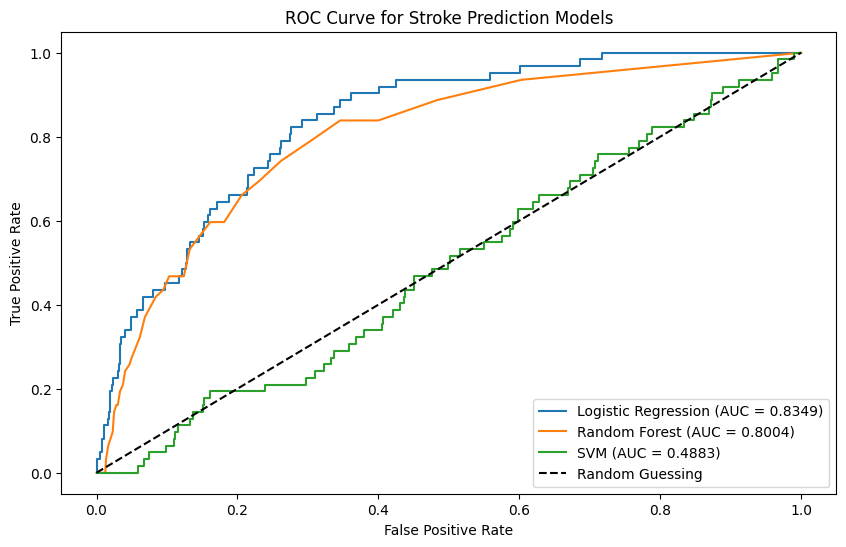

Logistic Regression AUC: 0.8349
Random Forest AUC: 0.8004
SVM AUC: 0.4883


In [13]:
# Import necessary libraries for ROC and AUC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate probabilities for ROC curves
log_prob = log_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]
svm_prob = svm_model.decision_function(X_test)  # SVM uses decision function

# Compute ROC curve and AUC for each model
log_fpr, log_tpr, _ = roc_curve(y_test, log_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, log_prob):.4f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_prob):.4f})")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {roc_auc_score(y_test, svm_prob):.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stroke Prediction Models')
plt.legend()
plt.show()

# Display AUC values for all models
print(f"Logistic Regression AUC: {roc_auc_score(y_test, log_prob):.4f}")
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_prob):.4f}")
print(f"SVM AUC: {roc_auc_score(y_test, svm_prob):.4f}")
